# Chapter5

## Image Enhancement

#### Image Inverse

In [36]:
pip install pydicom

     |████████████████████████████████| 1.9 MB 2.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


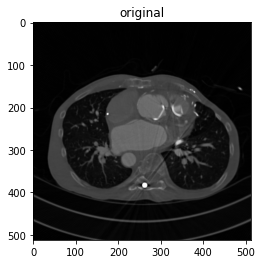

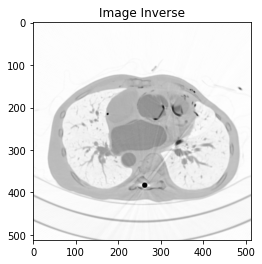

In [9]:
import cv2
import matplotlib.pyplot as plt

# Opening the image.
im = cv2.imread('../Figures/imageinverse_input.png')
#Ada: showing original image
plt.title("original")
plt.imshow(im)
plt.show()
# Performing the inversion operation
im2 = 255 - im
# Saving the image as imageinverse_output.png in
# Figures folder.
plt.title("Image Inverse")
plt.imshow(im2)
#Ada: turn axis lines and labels on
# plt.axis("off")
plt.show()

#### Power Law Transformation

/home/ada/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


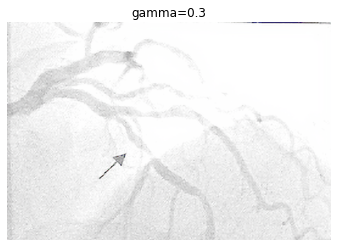

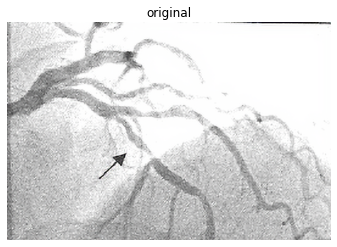

/home/ada/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log


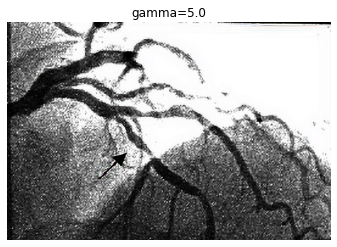

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Opening the image.
a = cv2.imread('../Figures/angiogram1.png')
# gamma is initialized.
gamma = 0.3
# b is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b3 = np.max(b1)
# b1 is normalized 
b2 = b1/b3
# gamma-correction exponent is computed.
b4 = np.log(b2)*gamma
# gamma-correction is performed.
c = np.exp(b4)*255.0
# c is converted to type int.
c1 = c.astype(int)
# Displaying c1
plt.axis("off")
plt.title("gamma=0.3")
plt.imshow(c1)
plt.show()
#Ada: Compare the outputs with different gamma value
#Ada: showing original image
plt.axis("off")
plt.title("original")
plt.imshow(a)
plt.show()
#Ada: try different gamma value. Gamma is set to 5.0
gamma2 = 5.0
# gamma-correction exponent is computed.
b5 = np.log(b2)*gamma2
# gamma-correction is performed.
d = np.exp(b5)*255.0
# d is converted to type int.
d1 = d.astype(int)
# Displaying d1
plt.axis("off")
plt.title("gamma=5.0")
plt.imshow(d1)
plt.show()

## Log Transformation

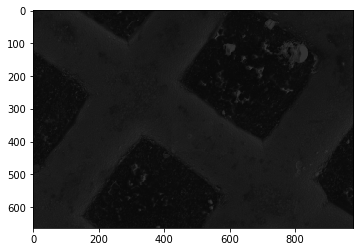

In [2]:

import cv2
import numpy, math
import matplotlib.pyplot as plt

# Opening the image.
a = cv2.imread('../Figures/bse.png')
# a is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b2 = numpy.max(b1)
# Performing the log transformation.
c = (255.0*numpy.log(1+b1))/numpy.log(1+b2)
# c is converted to type int.
c1 = c.astype(int)
# Saving c1 as logtransform_output.png.
plt.imshow(a)
plt.show()

#### Histogram Equalization

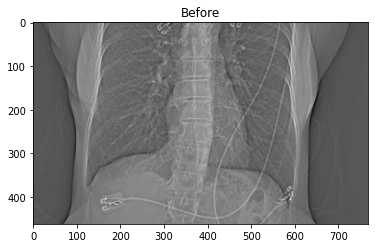

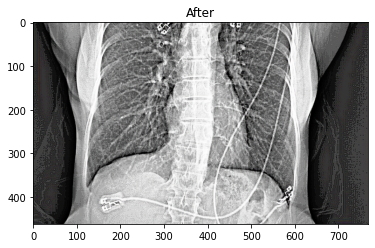

In [6]:

import cv2
import numpy as np 
import matplotlib.pyplot as plt

# Opening the image.
img1 = cv2.imread('../Figures/hequalization_input.png')
# 2D array is converted to a 1D array.
fl = img1.flatten()
# Histogram and the bins of the image are computed.
hist,bins = np.histogram(img1,256,[0,255])
# cumulative distribution function is computed 
cdf = hist.cumsum()
# Places where cdf=0 is masked or ignored and 
# rest is stored in cdf_m.
cdf_m = np.ma.masked_equal(cdf,0)
# Histogram equalization is performed.
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max()-cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
# The masked places in cdf_m are now 0.
cdf = np.ma.filled(cdf_m,0).astype('uint8')
# cdf values are assigned in the flattened array.
im2 = cdf[fl]
# im2 is 1D so we use reshape command to.
#  make it into 2D. 
im3 = np.reshape(im2,img1.shape)
# Saving im3 as hequalization_output.png
# in Figures folder 
plt.title("Before")
plt.imshow(img1)
plt.show()
plt.title("After")
plt.imshow(im3)
plt.show()

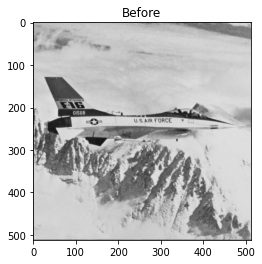

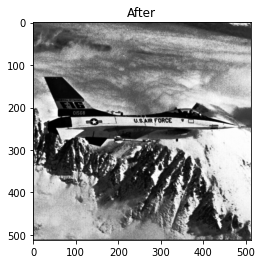

In [7]:
#Ada: try the airplane image
import cv2
import numpy as np 
import matplotlib.pyplot as plt

# Opening the image.
img1 = cv2.imread('../Figures/grayscale_airplane-Copy1.png')
# 2D array is converted to a 1D array.
fl = img1.flatten()
# Histogram and the bins of the image are computed.
hist,bins = np.histogram(img1,256,[0,255])
# cumulative distribution function is computed 
cdf = hist.cumsum()
# Places where cdf=0 is masked or ignored and 
# rest is stored in cdf_m.
cdf_m = np.ma.masked_equal(cdf,0)
# Histogram equalization is performed.
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max()-cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
# The masked places in cdf_m are now 0.
cdf = np.ma.filled(cdf_m,0).astype('uint8')
# cdf values are assigned in the flattened array.
im2 = cdf[fl]
# im2 is 1D so we use reshape command to.
#  make it into 2D. 
im3 = np.reshape(im2,img1.shape)
# Saving im3 as hequalization_output.png
# in Figures folder 
plt.title("Before")
plt.imshow(img1)
plt.show()
plt.title("After")
plt.imshow(im3)
plt.show()

#### Contrast Limited Adaptive Histogram Equalization


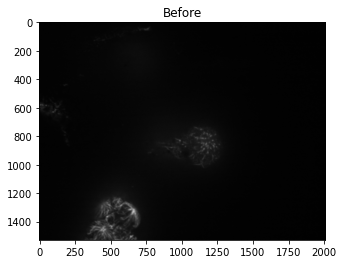

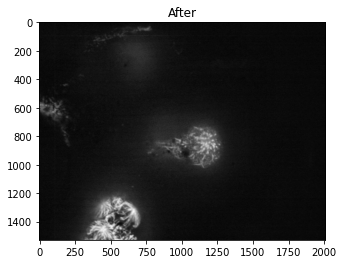

In [16]:
import cv2
from skimage.exposure import equalize_adapthist
import matplotlib.pyplot as plt

img = cv2.imread('../Figures/embryo.png')
# Applying Clahe.
img2 = equalize_adapthist(img, clip_limit = 0.02)

# Rescaling img2 from 0 to 255.
img3 = img2*255.0
#Ada: convert img3 to type int
img3 = img3.astype(int)
plt.title("Before")
plt.imshow(img)
plt.show()
plt.title("After")
plt.imshow(img3)
plt.show()

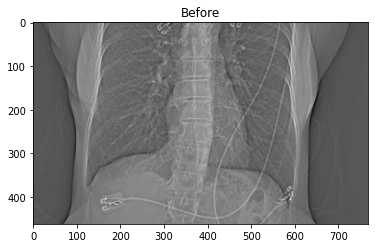

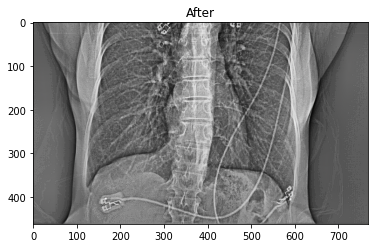

In [21]:
#Ada: try the body image
import cv2
from skimage.exposure import equalize_adapthist
import matplotlib.pyplot as plt

img = cv2.imread('../Figures/hequalization_input.png')
#Ada: clip_limit set to 0.01
img2 = equalize_adapthist(img, clip_limit = 0.01)

# Rescaling img2 from 0 to 255.
img3 = img2*255.0
#Ada: convert img3 to type int
img3 = img3.astype(int)

plt.title("Before")
plt.imshow(img)
plt.show()
plt.title("After")
plt.imshow(img3)
plt.show()

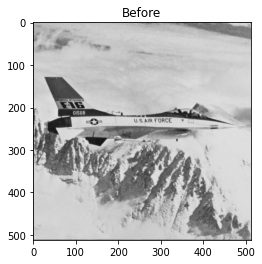

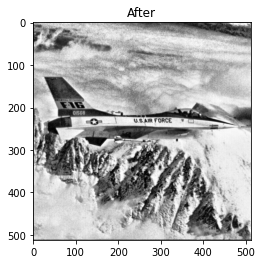

In [14]:
#Ada: try the airplane image
import cv2
from skimage.exposure import equalize_adapthist
import matplotlib.pyplot as plt

img = cv2.imread('../Figures/grayscale_airplane-Copy1.png')
# Applying Clahe.
img2 = equalize_adapthist(img, clip_limit = 0.02)

# Rescaling img2 from 0 to 255.
img3 = img2*255.0
#Ada: convert img3 to type int
img3 = img3.astype(int)

plt.title("Before")
plt.imshow(img)
plt.show()
plt.title("After")
plt.imshow(img3)
plt.show()

#### Contrast Stretching

0 255


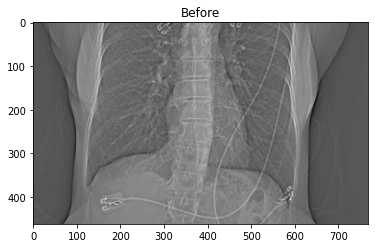

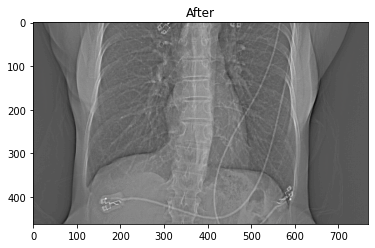

In [28]:
import cv2
import matplotlib.pyplot as plt

# Opening the image.
im = cv2.imread('../Figures/hequalization_input.png')
# Finding the maximum and minimum pixel values
b = im.max()
a = im.min()
print(a,b)
# Converting im1 to float.
c = im.astype(float)
# Contrast stretching transformation.
im1 = 255.0*(c-a)/(b-a)
#Ada: convert im1 to type int
im1 = im1.astype(int)
plt.title("Before")
plt.imshow(im)
plt.show()
plt.title("After")
plt.imshow(im1)
plt.show() 
#Ada:The minimum pixel value in the image is equal to 0 and the maximum pixel value is equal to 255 
#Ada: so the contrast stretching transformation will not have any effect.

16 231


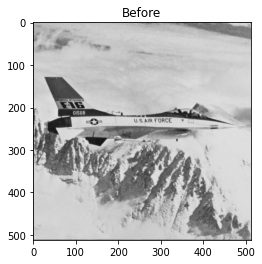

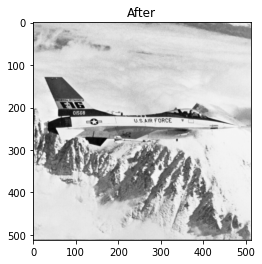

In [29]:
#Ada: try the airplane image
# Opening the image.
im = cv2.imread('../Figures/grayscale_airplane-Copy1.png')
# Finding the maximum and minimum pixel values
b = im.max()
a = im.min()
print(a,b)
# Converting im1 to float.
c = im.astype(float)
# Contrast stretching transformation.
im1 = 255.0*(c-a)/(b-a)
#Ada: convert im1 to type int
im1 = im1.astype(int)
plt.title("Before")
plt.imshow(im)
plt.show()
plt.title("After")
plt.imshow(im1)
plt.show() 

#### Sigmoid Correction

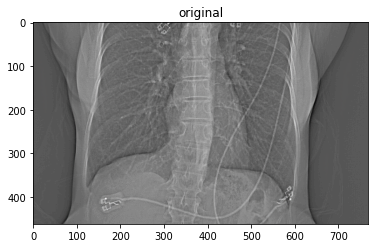

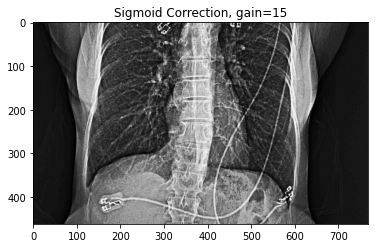

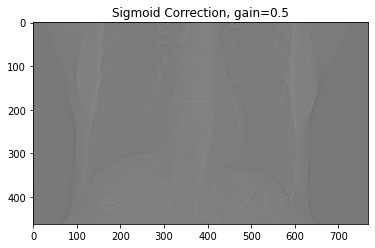

In [31]:
import cv2
from skimage.exposure import adjust_sigmoid
import matplotlib.pyplot as plt

# Reading the image.
img1 = cv2.imread('../Figures/hequalization_input.png')
# Applying Sigmoid correction.
img2 =  adjust_sigmoid(img1, gain=15)
#Ada: try gain = 0.5
img3 =  adjust_sigmoid(img1, gain=0.5)
# showing images
plt.title("original")
plt.imshow(img1)
plt.show()
plt.title("Sigmoid Correction, gain=15")
plt.imshow(img2)
plt.show() 
plt.title("Sigmoid Correction, gain=0.5")
plt.imshow(img3)
plt.show() 

#### Local Contrast Normalization

In [48]:
#Ada: Could not run the original program properly, so here's the one from textbook
import pydicom
import numpy as np
import skimage.exposure as imexp
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from PIL import Image
def localfilter(im, sigma=(10, 10,)):
    im_gaussian = gaussian_filter(im, sigma=sigma[0])
    d = im_gaussian-im
    s = np.sqrt(gaussian_filter(d*d, sigma=sigma[1]))
    # form an array where all elements have a value of mean(s)
    mean_array = np.ones(s.shape)*np.mean(s)
    # find element by element maximum between mean_array and s
    max_array = np.maximum(mean_array, s)
    y = d/(max_array+np.spacing(1.0))
    return y
file_name = "../Figures/FluroWithDisplayShutter.dcm"
dfh = pydicom.read_file(file_name, force=True)
im = dfh.pixel_array
# convert to float and scale before applying filter
im = im.astype(np.float)
im1 = im/np.max(im)
sigma = (5, 5,)
im2 = localfilter(im, sigma)
# rescale to 8-bit
im3 = 255*(im2-im2.min())/(im2.max()-im2.min())
im4 = Image.fromarray(im3).convert("L")
im4.show()